In [1]:
# testing wafer pose estimation by using marker array
import cv2
import numpy as np
from matplotlib import pyplot as plt

WAFER_MARKER_MAP = {
1:(-40.0,140.0),    2:(-20.0,140.0),    3:(0.0,140.0),      4:(20.0,140.0),     5:(40.0,140.0),  
6:(-80.0,120.0),    7:(-60.0,120.0),    8:(-40.0,120.0),    9:(-20.0,120.0),    10:(0.0,120.0),     11:(20.0,120.0),    12:(40.0,120.0),    13:(60.0,120.0),    14:(80.0,120.0),   
15:(-100.0,100.0),  16:(-80.0,100.0),   17:(-60.0,100.0),   18:(-40.0,100.0),   19:(-20.0,100.0),   20:(0.0,100.0),     21:(20.0,100.0),    22:(40.0,100.0),    23:(60.0,100.0),    24:(80.0,100.0),    25:(100.0,100.0),   
26:(-120.0,80.0),   27:(-100.0,80.0),   28:(-80.0,80.0),    29:(-60.0,80.0),    30:(-40.0,80.0),    31:(-20.0,80.0),    32:(0.0,80.0),      33:(20.0,80.0),     34:(40.0,80.0),     35:(60.0,80.0),     36:(80.0,80.0),     37:(100.0,80.0),    38:(120.0,80.0),
39:(-120.0,60.0),   40:(-100.0,60.0),   41:(-80.0,60.0),    42:(-60.0,60.0),    43:(-40.0,60.0),    44:(-20.0,60.0),    45:(0.0,60.0),      46:(20.0,60.0),     47:(40.0,60.0),     48:(60.0,60.0),     49:(80.0,60.0),     50:(100.0,60.0),    51:(120.0,60.0),   
52:(-140.0,40.0),   53:(-120.0,40.0),   54:(-100.0,40.0),   55:(-80.0,40.0),    56:(-60.0,40.0),    57:(-40.0,40.0),    58:(-20.0,40.0),    59:(0.0,40.0),      60:(20.0,40.0),     61:(40.0,40.0),     62:(60.0,40.0),     63:(80.0,40.0),     64:(100.0,40.0),    65:(120.0,40.0),    66:(140.0,40.0),
67:(-140.0,20.0),   68:(-120.0,20.0),   69:(-100.0,20.0),   70:(-80.0,20.0),    71:(-60.0,20.0),    72:(-40.0,20.0),    73:(-20.0,20.0),    74:(0.0,20.0),      75:(20.0,20.0),     76:(40.0,20.0),     77:(60.0,20.0),     78:(80.0,20.0),     79:(100.0,20.0),    80:(120.0,20.0),    81:(140.0,20.0),
82:(-140.0,0.0),    83:(-120.0,0.0),    84:(-100.0,0.0),    85:(-80.0,0.0),     86:(-60.0,0.0),     87:(-40.0,0.0),     88:(-20.0,0.0),     89:(0.0,0.0),       90:(20.0,0.0),      91:(40.0,0.0),      92:(60.0,0.0),      93:(80.0,0.0),      94:(100.0,0.0),     95:(120.0,0.0),     96:(140.0,0.0),
97:(-140.0,-20.0),  98:(-120.0,-20.0),  99:(-100.0,-20.0),  100:(-80.0,-20.0),  101:(-60.0,-20.0),  102:(-40.0,-20.0),  103:(-20.0,-20.0),  104:(0.0,-20.0),    105:(20.0,-20.0),   106:(40.0,-20.0),   107:(60.0,-20.0),   108:(80.0,-20.0),   109:(100.0,-20.0),  110:(120.0,-20.0),  111:(140.0,-20.0),
112:(-140.0,-40.0), 113:(-120.0,-40.0), 114:(-100.0,-40.0), 115:(-80.0,-40.0),  116:(-60.0,-40.0),  117:(-40.0,-40.0),  118:(-20.0,-40.0),  119:(0.0,-40.0),    120:(20.0,-40.0),   121:(40.0,-40.0),   122:(60.0,-40.0),   123:(80.0,-40.0),   124:(100.0,-40.0),  125:(120.0,-40.0),  126:(140.0,-40.0), 
127:(-120.0,-60.0), 128:(-100.0,-60.0), 129:(-80.0,-60.0),  130:(-60.0,-60.0),  131:(-40.0,-60.0),  132:(-20.0,-60.0),  133:(0.0,-60.0),    134:(20.0,-60.0),   135:(40.0,-60.0),   136:(60.0,-60.0),   137:(80.0,-60.0),   138:(100.0,-60.0),  139:(120.0,-60.0),   
140:(-120.0,-80.0), 141:(-100.0,-80.0), 142:(-80.0,-80.0),  143:(-60.0,-80.0),  144:(-40.0,-80.0),  145:(-20.0,-80.0),  146:(0.0,-80.0),    147:(20.0,-80.0),   148:(40.0,-80.0),   149:(60.0,-80.0),   150:(80.0,-80.0),   151:(100.0,-80.0),  152:(120.0,-80.0),
153:(-100.0,-100.0),154:(-80.0,-100.0), 155:(-60.0,-100.0), 156:(-40.0,-100.0), 157:(-20.0,-100.0), 158:(0.0,-100.0),   159:(20.0,-100.0),  160:(40.0,-100.0),  161:(60.0,-100.0),  162:(80.0,-100.0),  163:(100.0,-100.0),
164:(-80.0,-120.0), 165:(-60.0,-120.0), 166:(-40.0,-120.0), 167:(-20.0,-120.0), 168:(0.0,-120.0),   169:(20.0,-120.0), 170:(40.0,-120.0),   171:(60.0,-120.0),  172:(80.0,-120.0),
173:(-40.0,-140.0), 174:(-20.0,-140.0), 175:(0.0,-140.0),   176:(20.0,-140.0),  177:(40.0,-140.0)
}

mtx = np.matrix([[2517.792, 0., 814.045],[0., 2514.767, 567.330],[0., 0., 1.]])
dist = np.matrix([[-0.361044, 0.154482, 0.000808, 0.000033, 0.]])

[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (501) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


> high resolution video info : (1600,1200@5.0), -1 frames


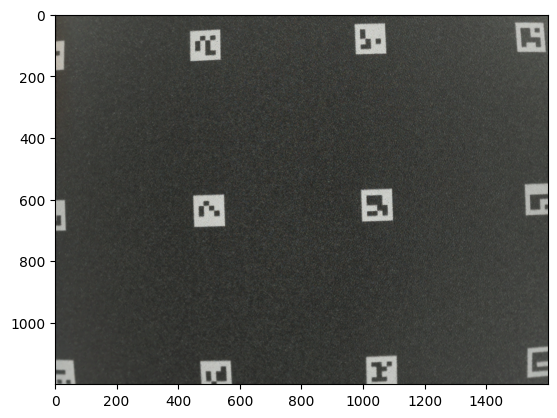

In [3]:
# use camera device
device = cv2.VideoCapture(0)
device.set(cv2.CAP_PROP_FRAME_WIDTH, 1600)
device.set(cv2.CAP_PROP_FRAME_HEIGHT, 1200)
device.set(cv2.CAP_PROP_AUTO_EXPOSURE, 0)
device.set(cv2.CAP_PROP_AUTO_WB, 0)
success, raw = device.read()
if success is False:
    print("Cannot read data from camera device")
    exit()

w  = int(device.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(device.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = device.get(cv2.CAP_PROP_FPS)
frames = int(device.get(cv2.CAP_PROP_FRAME_COUNT))
print("> high resolution video info : ({},{}@{}), {} frames".format(w, h, fps, frames))
newcameramtx, roi_high = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))

markerdict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
markerparams = cv2.aruco.DetectorParameters_create()
markerparams.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX #marker detection refinement

plt.cla()
plt.imshow(raw)
plt.show()

raw_undist = cv2.undistort(raw, mtx, dist, None, newcameramtx)
gray = cv2.cvtColor(raw_undist, cv2.COLOR_BGR2GRAY)
corners, ids, rejected = cv2.aruco.detectMarkers(gray, markerdict, parameters=markerparams)

device.release()

